In [14]:
using Statistics, Plots, StatsPlots, Measures, BSON

In [6]:
BSON.@load "Posterior_Samples/level2_posterior_samples_test1_mixed.bson" posterior_samples_test1_mixed
BSON.@load "Posterior_Samples/level2_posterior_samples_test2_mixed.bson" posterior_samples_test2_mixed
BSON.@load "Posterior_Samples/level2_posterior_samples_test1_uniform.bson" posterior_samples_test1_uniform
BSON.@load "Posterior_Samples/level2_posterior_samples_test2_uniform.bson" posterior_samples_test2_uniform

[ Info: Saved animation to /Users/aruf650/Library/CloudStorage/OneDrive-Personal/Uni/PhD/Research/Overhypothesis/Analysis/Cognitive_Model/Julia/Models/theta_evolution_full.gif


Plots.AnimatedGif("/Users/aruf650/Library/CloudStorage/OneDrive-Personal/Uni/PhD/Research/Overhypothesis/Analysis/Cognitive_Model/Julia/Models/theta_evolution_full.gif")
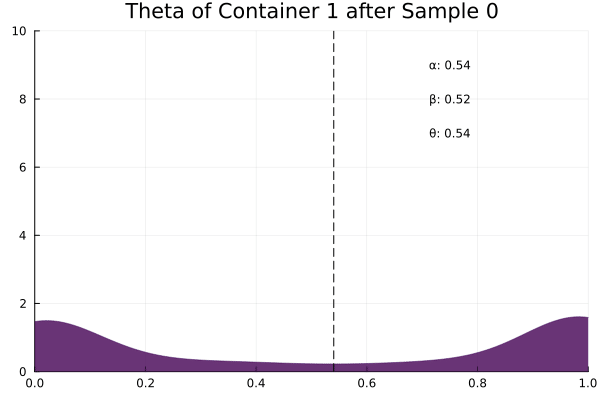

In [16]:
# Function to animate the evolution of theta posteriors across all containers and samples
function animate_theta_evolution_all_containers(posterior_samples)
    # Get sorted container indices
    container_indices = sort(collect(keys(posterior_samples)))

    # Define a color palette for the containers
    container_colors = palette(:viridis, length(container_indices))

    # Flatten all (container, sample) pairs into a single sequence
    sample_pairs = [(container_index, sample_index)
                    for container_index in container_indices
                    for sample_index in 1:length(posterior_samples[container_index][:theta])]

    # Create an animation object
    anim = @animate for (container_index, sample_index) in sample_pairs
        # Get the color for the current container
        fill_color = container_colors[findfirst(==(container_index), container_indices)]

        # Extract theta, alpha, and beta samples for the current sample
        theta_samples = posterior_samples[container_index][:theta][sample_index]
        alpha_samples = posterior_samples[container_index][:alpha][sample_index]
        beta_samples = posterior_samples[container_index][:beta][sample_index]

        # Calculate medians
        theta_median = median(theta_samples)
        alpha_median = median(alpha_samples)
        beta_median = median(beta_samples)

        # Create the plot for the current (container, sample) pair
        p = plot(
            xlims = (0, 1), ylims = (0, 10), legend = false,
            title = "Theta of Container $container_index after Sample $(sample_index-1)"
        )
        density!(theta_samples, fill = true, fillalpha = 0.8, alpha = 0.5, color = fill_color)

        # Show the median line for theta
        vline!([theta_median], color = :black, linestyle = :dash, linewidth = 1)

        # Annotate with the median values of theta, alpha, and beta
        annotate!(0.75, 9, text("α: $(round(alpha_median, digits = 2))", 8))
        annotate!(0.75, 8, text("β: $(round(beta_median, digits = 2))", 8))
        annotate!(0.75, 7, text("θ: $(round(theta_median, digits = 2))", 8))

        # Yield the plot to the animation
        plot(p)
    end

    # Save the animation as a gif
    gif(anim, "theta_evolution_full.gif", fps = 10)
end

# Example usage with extracted posterior samples
animate_theta_evolution_all_containers(posterior_samples_test2_uniform)


[ Info: Saved animation to /Users/aruf650/Library/CloudStorage/OneDrive-Personal/Uni/PhD/Research/Overhypothesis/Analysis/Cognitive_Model/Julia/Models/theta_evolution_test.gif


Plots.AnimatedGif("/Users/aruf650/Library/CloudStorage/OneDrive-Personal/Uni/PhD/Research/Overhypothesis/Analysis/Cognitive_Model/Julia/Models/theta_evolution_test.gif")
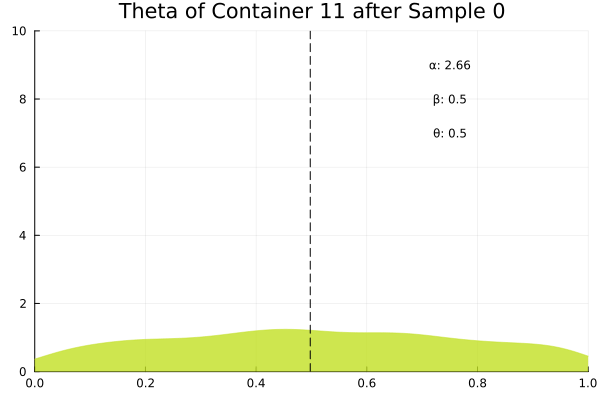

In [46]:
using Plots
using Statistics  # For median function

# Function to animate the evolution of theta posteriors for the last test container
function animate_theta_evolution_test(posterior_samples, container_index)
    # Ensure the given container exists
    if !haskey(posterior_samples, container_index)
        error("Container $container_index not found in posterior samples.")
    end

    # Extract the color for the specified container
    container_colors = palette(:viridis, length(posterior_samples)+1)
    fill_color = container_colors[container_index]

    # Get the number of samples for the specified container
    n_samples = length(posterior_samples[container_index][:theta])

    # Create an animation object
    anim = @animate for sample_index in 1:n_samples
        # Extract theta, alpha, and beta samples for the current sample
        theta_samples = posterior_samples[container_index][:theta][sample_index]
        alpha_samples = posterior_samples[container_index][:alpha][sample_index]
        beta_samples = posterior_samples[container_index][:beta][sample_index]

        # Calculate medians
        theta_median = median(theta_samples)
        alpha_median = median(alpha_samples)
        beta_median = median(beta_samples)

        # Plot the density of theta samples and fill the area under the curve
        p = plot(
            xlims = (0, 1), ylims = (0, 10), legend = false,
            title = "Theta of Container $container_index after Sample $(sample_index-1)"
        )
        density!(theta_samples, fill = true, fillalpha = 0.8, alpha = 0.5, color = fill_color)

        # Show the median line for theta
        vline!([theta_median], color = :black, linestyle = :dash, linewidth = 1)

        # Annotate with the median values of theta, alpha, and beta
        annotate!(0.75, 9, text("α: $(round(alpha_median, digits = 2))", 8))
        annotate!(0.75, 8, text("β: $(round(beta_median, digits = 2))", 8))
        annotate!(0.75, 7, text("θ: $(round(theta_median, digits = 2))", 8))

        # Display the plot
        plot(p)
    end

    # Save the animation as a GIF
    gif(anim, "theta_evolution_test.gif", fps = 2)
end

# Example usage with extracted posterior samples
animate_theta_evolution_test(posterior_samples_test1_mixed, 11)  # Replace '2' with the desired container index


[ Info: Saved animation to /Users/aruf650/Library/CloudStorage/OneDrive-Personal/Uni/PhD/Research/Overhypothesis/Analysis/Cognitive_Model/Julia/Models/theta_evolution_combined_dark.gif
[ Info: Saved animation to /Users/aruf650/Library/CloudStorage/OneDrive-Personal/Uni/PhD/Research/Overhypothesis/Analysis/Cognitive_Model/Julia/Models/theta_evolution_combined_dark.gif


Plots.AnimatedGif("/Users/aruf650/Library/CloudStorage/OneDrive-Personal/Uni/PhD/Research/Overhypothesis/Analysis/Cognitive_Model/Julia/Models/theta_evolution_combined_dark.gif")
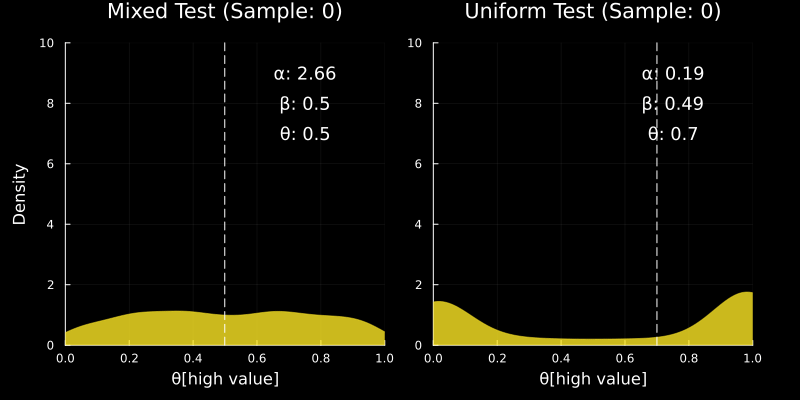

In [56]:
# using Plots
using Statistics  # For median function



# Function to animate two sets of posterior evolutions side by side
function animate_theta_evolution_combined(posterior_samples1, posterior_samples2, container_index)
    # Ensure the specified container exists in both posterior sets
    if !(haskey(posterior_samples1, container_index) && haskey(posterior_samples2, container_index))
        error("Container $container_index not found in both posterior samples.")
    end

    # Get the color palette and colors for the container
    container_colors = palette(:viridis, length(posterior_samples1)+1)
    fill_color1 = container_colors[container_index]
    fill_color2 = container_colors[container_index]

    # Get the number of samples for the specified container
    n_samples = length(posterior_samples1[container_index][:theta])

    # Create an animation object
    anim = @animate for sample_index in 1:n_samples
        # Extract theta, alpha, and beta samples for the first posterior set
        theta_samples1 = posterior_samples1[container_index][:theta][sample_index]
        alpha_samples1 = posterior_samples1[container_index][:alpha][sample_index]
        beta_samples1 = posterior_samples1[container_index][:beta][sample_index]

        # Calculate medians for the first posterior set
        theta_median1 = median(theta_samples1)
        alpha_median1 = median(alpha_samples1)
        beta_median1 = median(beta_samples1)

        # Extract theta, alpha, and beta samples for the second posterior set
        theta_samples2 = posterior_samples2[container_index][:theta][sample_index]
        alpha_samples2 = posterior_samples2[container_index][:alpha][sample_index]
        beta_samples2 = posterior_samples2[container_index][:beta][sample_index]

        # Calculate medians for the second posterior set
        theta_median2 = median(theta_samples2)
        alpha_median2 = median(alpha_samples2)
        beta_median2 = median(beta_samples2)

        # Create the first plot for the first posterior set
        p1 = plot(
            xlims = (0, 1), ylims = (0, 10), legend = false,
            title = "Mixed Test (Sample: $(sample_index-1))", xlab = "θ[high value]", ylab = "Density",
            background_color = :black, fg_color = :white, bottom_margin = 5mm, left_margin = 5mm
        )
        density!(theta_samples1, fill = true, fillalpha = 0.8, alpha = 0.5, color = fill_color1)
        vline!([theta_median1], color = :white, linestyle = :dash, linewidth = 1)
        annotate!(0.75, 9, text("α: $(round(alpha_median1, digits = 2))", 12, :white))
        annotate!(0.75, 8, text("β: $(round(beta_median1, digits = 2))", 12, :white))
        annotate!(0.75, 7, text("θ: $(round(theta_median1, digits = 2))", 12, :white))

        # Create the second plot for the second posterior set
        p2 = plot(
            xlims = (0, 1), ylims = (0, 10), legend = false,
            title = "Uniform Test (Sample: $(sample_index-1))", xlab = "θ[high value]",
            background_color = :black, fg_color = :white, top_margin = 5mm, right_margin = 10mm
        )
        density!(theta_samples2, fill = true, fillalpha = 0.8, alpha = 0.5, color = fill_color2)
        vline!([theta_median2], color = :white, linestyle = :dash, linewidth = 1)
        annotate!(0.75, 9, text("α: $(round(alpha_median2, digits = 2))", 12, :white))
        annotate!(0.75, 8, text("β: $(round(beta_median2, digits = 2))", 12, :white))
        annotate!(0.75, 7, text("θ: $(round(theta_median2, digits = 2))", 12, :white))

        # Combine the two plots side by side
        combined_plot = plot(p1, p2, layout = (1, 2), size = (800, 400))

        # Yield the combined plot for this frame
        combined_plot
    end

    # Save the animation as a GIF
    gif(anim, "theta_evolution_combined_dark.gif", fps = 1)
end

# Example usage with extracted posterior samples
animate_theta_evolution_combined(posterior_samples_test1_mixed, posterior_samples_test1_uniform, 11)  # Use the desired container index
animate_theta_evolution_combined(posterior_samples_test2_mixed, posterior_samples_test2_uniform, 12)